In [1]:
import sys, os
import numpy as np

sys.path += ['./datavyz', './neural_network_dynamics', './code']
from datavyz import graph_env_manuscript as ge

### A demo fig for the effect of CB1-signalling on L23 PN

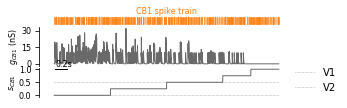

In [24]:
# Poisson process
np.random.seed(10)
CB1_rate = 150. # Hz
gCB10 = 10
tstop, dt = 4., 1e-4
t = np.arange(int(tstop/dt))*dt
pre_events = np.cumsum(np.random.exponential(1./CB1_rate, int(1.5*tstop*CB1_rate)))
pre_events = pre_events[pre_events<tstop]

# synaptic integration
release_prob, Tau = 0.5, 5e-3
shifts = [0, 1, 2, 3, 3.5]
Nlevels = 4
signalling, current = 0*t, 0*t

for i, s in enumerate(shifts):
    signalling[t>s] = i/(len(shifts)-1)

fig, [ax1,ax2,ax3] = ge.figure(axes_extents=[[[1,2]],
                                        [[1,8]],
                                        [[1,6]]],
                    figsize=(2.,.07), left=3)

sizes = {'spikes':1, 'current':3, 'signalling':3}
for e in pre_events:
    ax1.plot([e,e], [0,1], color=ge.orange, lw=0.5)
    it = int(e/dt)
    if np.random.uniform(0,1)<(release_prob*(1-signalling[it])):
        current[it:it+int(1/dt)] += gCB10*np.exp(-(t[it:it+int(1/dt)]-t[it])/Tau) 
ax2.plot(t, current, color=ge.dimgrey, lw=1)
ax3.plot(t, signalling, lw=1, color=ge.dimgrey)
ax3.plot(t, 0*t, ':', lw=0.5, color=ge.dimgrey, label='V1')
ax3.plot(t, 0*t+0.5, ':', lw=0.5, color=ge.dimgrey, label='V2')
ax3.legend(loc=(1,0), frameon=False)
    
ge.draw_bar_scales(ax3, Xbar=0.2, Xbar_label='0.2s', Ybar=1e-12)
ge.set_plot(ax1, [])
ge.set_plot(ax2, ['left'], ylabel='$g_{CB1}$ (nS)')
ge.set_plot(ax3, ['left'], ylabel='$s_{CB1}$', yticks=[0,0.5,1])
ge.annotate(ax1, 'CB1 spike train', (0.5, 1), ha='center', color=ge.orange)
ge.save_on_desktop(fig, 'fig.svg')